In [60]:
import numpy as np

## 3.2激活函数
### 3.2.1 sigmoid


In [61]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [62]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### 3.2.2 阶跃函数：step_function

In [63]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

# def step_function(x):
#     if x > 0:
#         return 1
#     else:
#         return 0
def step_function(x):
    y = x > 0
    return y.astype(np.int)

为了便于后面的操作，我们把它修改为支持NumPy数组的实现。

In [64]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [65]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [66]:
y = x > 0
y

array([False,  True,  True])

In [67]:
# astype()方法通过参数指定期望的类型，这个例子中是 np.int型。 
y = y.astype(np.int8)
y

array([0, 1, 1], dtype=int8)

### 3.2.3 阶跃函数的图形

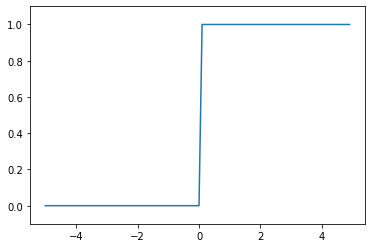

In [68]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴范围
plt.show()

### 3.2.4 sigmod函数实现
$$
h(x)=\frac{1}{1+\exp(-x)}
$$

In [69]:
def sigmod(x):
    return 1 / (1 + np.exp(-x))

In [70]:
x = np.array([-1.0, 1.0, 2.0])
sigmod(x)

array([0.26894142, 0.73105858, 0.88079708])

### 3.2.5 sigmod和阶跃函数的比较
感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号。

### 3.2.6 非线性函数
sigmod和阶跃函数还有共同点，都属**非线性函数**。

神经网络的激活函数必须使用非线性函数。

### 3.2.7 ReLU函数
$$
h(x)=\left\{\begin{array}{ll}x&(x>0)\\[1ex]0&(x\leqslant0)\end{array}\right.
$$


In [71]:
def relu(x):
    return np.maximum(0, x)

# maximum函数会从输入的数值中选择较大的那个值进行输出。

## 3.3 多维数组的运算
### 3.3.1 多维数组

In [72]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) # ndim() 一维数组
print(A.shape) # A.shape的结果是个元组（tuple）。
print(A.shape[0]) 

[1 2 3 4]
1
(4,)
4


In [73]:
B = np.array([[1,2], [3,4],[5,6]])
print(B)
print(np.ndim(B)) # ndim() 一维数组
print(B.shape) # A.shape的结果是个元组（tuple）。
print(B.shape[0]) 

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


二维数组也称为**矩阵（matrix）**。如图3-10所示，数组的横向排列称为**行（row）**，纵向排列称为列（column）。

### 3.3.2 矩阵乘法
当A是二维矩阵、 B是一维数组时，如图3-13所示，对应维度的元素个数要保持一致的原则依然成立。

<img src=./resource/Snipaste_2024-09-05_08-16-20.JPG  width="500" />

B从数学的角度来看，是1x2的矩阵，但是从理解上来看，一维数组，向量，被看作是列向量，即理解为：2x1的矩阵

(3x2).dot(2x1) = (3,1) ==> 一个列向量


In [74]:
A=np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [75]:
B = np.array([7,8])
B.shape

(2,)

In [76]:
np.dot(A,B)


array([23, 53, 83])

### 3.3.3 神经网路内积

<img src=./resource/Snipaste_2024-09-05_08-23-23.JPG  width="600" />

x实际上是特征，表示时，可以理解为(2x1)的数组。一般特征都以列向量来表示。


In [77]:
X=np.array([1,2])
X.shape

(2,)

In [78]:
W=np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [79]:
W.shape

(2, 3)

In [80]:
Y=np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4 三层神经网络的实现

In [81]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape) # (2,) 其实应该是 1行2列，相当于2个 特征
print(B1.shape) 

(2, 3)
(2,)
(3,)


In [82]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [83]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [84]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [85]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [86]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

### 代码实现小结
<img src=./resource/Snipaste_2024-09-05_08-32-09.JPG  width="600" />


In [87]:
"""
只把权重记为大写字母W1，其他的（偏置或中间结果等）都用小写字母表示。
"""

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

"""
forward（前向），它表示的是从输入到输出方向的传递处理。
后面在进行神经网络的训练时，我们将介绍后向（backward，从输出到输入方向）的处理。
"""
def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [88]:
network = init_network()
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 输出层的设计
神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。

一般而言，回归问题用恒等函数，分类问题用softmax函数。

### softmax

In [89]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) ## 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [90]:
# 具体例子
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

c:\ProgramData\miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [91]:
c=np.max(a)
print(c)

1010


In [92]:
a - c 

array([  0, -10, -20])

In [93]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

这里需要注意的是，即便使用了softmax函数，各个元素之间的大小关系也不会改变。这是因为指数函数（y = exp(x)）是单调递增函数。

求解机器学习问题的步骤可以分为**学习 和推理两个阶段**。首先， 在学习阶段进行模型的学习 ，然后，在推理阶段，用学到的模型对未知的数据进行推理（分类）。如前所述，推理阶段一般会省略输出层的 softmax 函数。在输出层使用 softmax 函数是因为它和神经网络的学习有关系.

In [94]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


### 输出层的神经元数量
对于分类问题，输出层的神经元数量一般设定为类别的数量。

## 手写数字识别

### MNIST数据集

In [95]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist

In [96]:
(X_train, t_train),(X_test, t_test) = load_mnist(flatten=True, normalize=False)

In [97]:
print(X_train.shape)

(60000, 784)


In [98]:
print(t_train.shape)

(60000,)


In [99]:
print(X_test.shape)

(10000, 784)


In [100]:
print(t_test.shape)

(10000,)


In [101]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [102]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [103]:
(X_train, t_train),(X_test, t_test) = load_mnist(flatten=True, normalize=False)

In [104]:
img = X_train[2]
label = t_train[2]
print(label)

4


In [105]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

(784,)
(28, 28)


In [107]:
img_show(img)

flatten=True时读入的图像是以一列（一维） NumPy数组的形式保存的。因此，显示图像时，需要把它变为原来的28像素 × 28像素的形状。可以通过 reshape()方法的参数指定期望的形状，更改NumPy数组的形状。此外，还需要把保存为NumPy数组的图像数据转换为PIL用数据对象，这个转换处理由Image.fromarray()来完成。